In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename1 = 'prices_round_2_day_-1.csv'
filename2 = 'prices_round_2_day_0.csv'
filename3 = 'prices_round_2_day_1.csv'

## Preprocessing


file1 = pd.read_csv(filename1,sep=';') ## The used separator is ;
#file1 = file1[file1['product'] == 'STARFRUIT'] ## Only use amethyst data 
#file1['weighted_mid'] = (file1['bid_volume_1']*file1['bid_price_1'] + file1['ask_volume_1']*file1['ask_price_1']) / (file1['bid_volume_1'] + file1['ask_volume_1'])
#file1 = file1.filter(['mid_price','timestamp','weighted_mid']) ## Only use the midprice and the timestamp column

## Same for the other files
file2 = pd.read_csv(filename2,sep=';') 
#file2 = file2[file2['product'] == 'STARFRUIT']
#file2['weighted_mid'] = (file2['bid_volume_1']*file2['bid_price_1'] + file2['ask_volume_1']*file2['ask_price_1']) / (file2['bid_volume_1'] + file2['ask_volume_1'])
#file2 = file2.filter(['mid_price','timestamp','weighted_mid'])


file3 = pd.read_csv(filename3,sep=';') 
#file3 = file3[file3['product'] == 'STARFRUIT']
#file3['weighted_mid'] = (file3['bid_volume_1']*file3['bid_price_1'] + file3['ask_volume_1']*file3['ask_price_1']) / (file3['bid_volume_1'] + file3['ask_volume_1'])
#file3 = file3.filter(['mid_price','timestamp','weighted_mid'])

file2['timestamp'] = file2['timestamp'].apply(lambda x: x + 1000000)
file3['timestamp'] = file3['timestamp'].apply(lambda x: x + 2000000)

data = pd.concat([file1,file2,file3]) ## Three days merged into 1 frame


In [4]:
data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
9996,2999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
9997,2999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
9998,2999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
9999,2999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


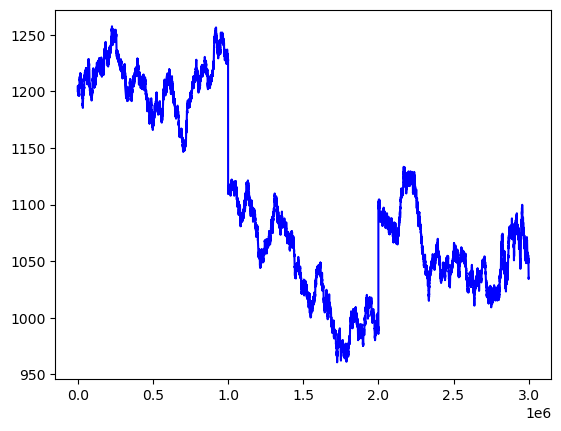

In [15]:
time = data['timestamp'].to_numpy()
sun = data['SUNLIGHT'].to_numpy()
hum = data['HUMIDITY'].to_numpy()
price = data['ORCHIDS'].to_numpy()
#plt.plot(time,sun,c='y')
plt.plot(time,price,c='b')
#plt.plot(time,price)


In [77]:
timestep = 12/10000

def prod_rate(n,sun,hum):
    prod = 100
    sun_time = sun[n]
    hum_time = hum[n]
    
    sun_time_cumu = 0
    ### sun_time cumu
    for i in range(n+1):
        sun_time_cumu = sun_time_cumu + sun[i]
        
    sun_time_cumu = sun_time_cumu / (n+1)
    #print('blub',sun_time_cumu)
    diff_sun = min(sun_time_cumu - 2500,0)
    subtr = diff_sun / 59.5238
    prod  = prod + 4*subtr
    
    ##Hum
    hum_out = 0
    diff_hum = 0
    if hum_time < 60:
        diff_hum = hum_time - 60
    if hum_time > 80:
        diff_hum = 80 - hum_time
    diff_hum = diff_hum/5
    prod = prod + 2*diff_hum
    
    return prod

    
prod = [prod_rate(n,sun,hum) for n in range(30000)]

In [55]:
prod_rate(2,sun,hum)

100.3578609537832

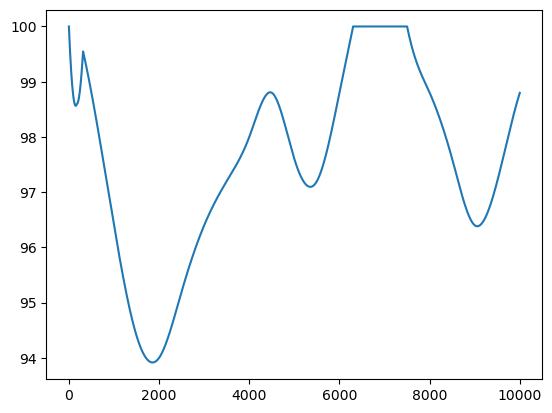

In [78]:
plt.plot([i for i in range(10000)], prod[:10000])


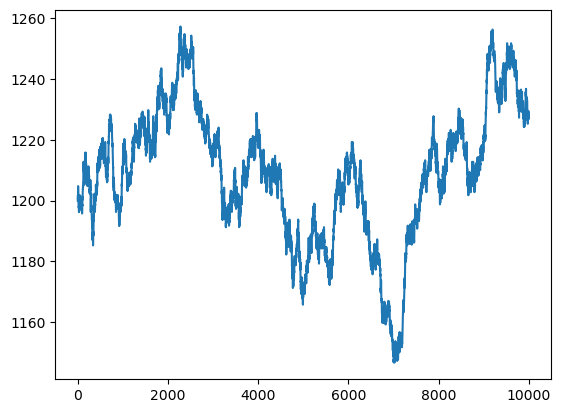

In [65]:
plt.plot([i for i in range(10000)], price[:10000])

In [69]:
### DAY 2

def prod_rate2(n,sun,hum):
    off = 10000
    prod = 100
    sun_time = sun[n + off]
    hum_time = hum[n + off]
    
    sun_time_cumu = 0
    ### sun_time cumu
    for i in range(n+1):
        sun_time_cumu = sun_time_cumu + sun[i + off]
        
    sun_time_cumu = sun_time_cumu / (n+1)
    #print('blub',sun_time_cumu)
    diff_sun = min(sun_time_cumu - 2500,0)
    subtr = diff_sun / 59.5238
    prod  = prod + 4*subtr
    
    ##Hum
    hum_out = 0
    diff_hum = 0
    if hum_time < 60:
        diff_hum = hum_time - 60
    if hum_time > 80:
        diff_hum = 80 - hum_time
    diff_hum = diff_hum/5
    prod = prod + 2*diff_hum
    
    return prod

    
prod = [prod_rate2(n,sun,hum) for n in range(10000)]




In [72]:
plt.plot([i for i in range(10000)], prod[10000:,:20000])

TypeError: list indices must be integers or slices, not tuple

In [73]:
x = [1,2,3,4]

In [74]:
x[1,3]

TypeError: list indices must be integers or slices, not tuple

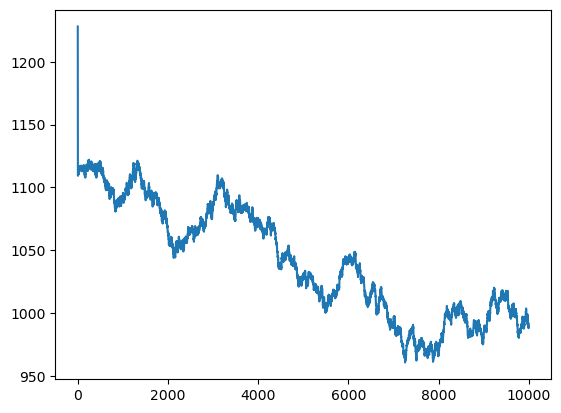

In [68]:
plt.plot([i for i in range(10000)], price[10000:20000])

In [81]:
def checkNan(n):
    if math.isnan(n): return 0
    return 1

bid_amt = []
for i in range(30000):
    res = checkNan(data['bid_volume_1'].to_numpy()[i]) + checkNan(data['bid_volume_2'].to_numpy()[i]) + checkNan(data['bid_volume_3'].to_numpy()[i])
    bid_amt.append(res)
    
ask_amt = []
for i in range(30000):
    res = checkNan(data['ask_volume_1'].to_numpy()[i]) + checkNan(data['ask_volume_2'].to_numpy()[i]) + checkNan(data['ask_volume_3'].to_numpy()[i])
    ask_amt.append(res)

In [83]:
data['bid_amt'] = bid_amt
data['ask_amt'] = ask_amt


In [97]:
data['bid_volume_2'].fillna(0,inplace=True)
data['bid_volume_3'].fillna(0,inplace=True)
data['ask_volume_2'].fillna(0,inplace=True)
data['ask_volume_3'].fillna(0,inplace=True)



data['total_bid'] = data['bid_volume_1']

In [98]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_mid,bid_amt,ask_amt
1,-2,0,STARFRUIT,4997,26,NaN,0.0,NaN,0.0,5003,26,NaN,0.0,NaN,0.0,5000.0,0.0,5000.000000,1,1
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,0.0,NaN,0.0,5002.0,0.0,5003.200000,3,1
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,0.0,5003,31,NaN,0.0,NaN,0.0,5000.0,0.0,5002.812500,2,1
7,-2,300,STARFRUIT,4996,27,NaN,0.0,NaN,0.0,5003,27,NaN,0.0,NaN,0.0,4999.5,0.0,4999.500000,1,1
9,-2,400,STARFRUIT,4995,20,NaN,0.0,NaN,0.0,5002,20,NaN,0.0,NaN,0.0,4998.5,0.0,4998.500000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,2999500,STARFRUIT,5049,28,NaN,0.0,NaN,0.0,5056,28,NaN,0.0,NaN,0.0,5052.5,0.0,5052.500000,1,1
19992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,0.0,5054,29,NaN,0.0,NaN,0.0,5051.0,0.0,5052.578947,2,1
19995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,0.0,5054,2,5055.0,24.0,NaN,0.0,5053.5,0.0,5053.666667,2,2
19996,0,2999800,STARFRUIT,5047,27,NaN,0.0,NaN,0.0,5052,1,5054.0,27.0,NaN,0.0,5049.5,0.0,5047.178571,1,2


In [158]:
'''###Linear regression setup
n = 4 ## This is the amount of explainatory variables
k = 1 ## This is how much in the future we want to look ## not yet implemented

#design matrix, this can probably be done nicer
vals = data['mid_price'].to_numpy()
#Y = vals[n:]
Y = data['weighted_mid'].to_numpy()[n:]
X = np.ones((30000-n,n+1))
for i in range(len(Y)):
    for j in range(n):
        X[i][j+1] = vals[i+j]
'''

###Linear regression setup
n = 2 ## This is the amount of explainatory variables
k = 1 ## This is how much in the future we want to look ## not yet implemented

#design matrix, this can probably be done nicer
vals = data['mid_price'].to_numpy()
exp1 = data['bid_volume_1'].to_numpy()
exp2 = data['ask_volume_1'].to_numpy()

exp3 = data['bid_price_1'].to_numpy()
exp4 = data['ask_price_1'].to_numpy()




shift = 1
Y = [vals[i+1] - vals[i] for i in range(shift,len(vals)-1)]
print(len(Y))
X = np.ones((30000-1 - shift,shift*4+1 + 2))
for i in range(len(Y)-1):
    X[i][1] = exp1[i + shift]
    X[i][2] = exp2[i + shift]
    X[i][3] = data['bid_amt'].to_numpy()[i + shift]
    X[i][4] = data['ask_amt'].to_numpy()[i + shift]
    X[i][5] = exp3[i + shift]
    X[i][6] = exp4[i + shift]

    
    
    

        
beta = np.linalg.lstsq(X,Y)

29998


C:\Users\paulh\AppData\Local\Temp\ipykernel_13908\3512541761.py:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X,Y)


In [159]:
X

array([[1.000e+00, 5.000e+00, 2.000e+01, ..., 1.000e+00, 5.000e+03,
        5.004e+03],
       [1.000e+00, 1.000e+00, 3.100e+01, ..., 1.000e+00, 4.997e+03,
        5.003e+03],
       [1.000e+00, 2.700e+01, 2.700e+01, ..., 1.000e+00, 4.996e+03,
        5.003e+03],
       ...,
       [1.000e+00, 9.000e+00, 2.900e+01, ..., 1.000e+00, 5.048e+03,
        5.054e+03],
       [1.000e+00, 1.000e+00, 2.000e+00, ..., 2.000e+00, 5.053e+03,
        5.054e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [160]:
beta[0]

array([ 2.75845941e+00, -1.48000746e-02,  5.64872243e-04, -1.27569906e+00,
        9.34811449e-01, -1.30973011e-02,  1.26828712e-02])

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
model = LinearRegression()
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [163]:
model.fit(X, Y)

#calculate R-squared of regression model
r_squared = model.score(X, Y)


In [164]:
print(r_squared)

0.25176660688473174
